In [2]:
import pandas as pd

ord = pd.read_csv('dataset/orders.csv/orders.csv')
pro = pd.read_csv('dataset/products.csv/products.csv')
pro_train = pd.read_csv('dataset/order_products__train.csv/order_products__train.csv')
pro_prior = pd.read_csv('dataset/order_products__prior.csv/order_products__prior.csv')
ais = pd.read_csv('dataset/aisles.csv/aisles.csv')
dep = pd.read_csv('dataset/departments.csv/departments.csv')

In [3]:
ord.info()
pro.info()
pro_train.info()
pro_prior.info()
ais.info()
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 138

In [4]:
culture_names = ["Afrikaans", "Albanian", "Arabic", "Armenian", "Bengali", "Bosnian", "Bulgarian", "Cantonese", "Catalan", "Chinese", "Croatian", "Czech", "Danish", "Dutch", "English", "Estonian", "Finnish", "French", "Georgian", "German", "Greek", "Gujarati", "Haitian Creole", "Hebrew", "Hindi", "Hungarian", "Icelandic", "Indonesian", "Irish", "Italian", "Japanese", "Kannada", "Kazakh", "Korean", "Latvian", "Lithuanian", "Macedonian", "Malay", "Malayalam", "Maltese", "Mandarin", "Marathi", "Nepali", "Norwegian", "Pashto", "Persian", "Polish", "Portuguese", "Punjabi", "Romanian", "Russian", "Serbian", "Slovak", "Slovenian", "Somali", "Spanish", "Swahili", "Swedish", "Tagalog", "Tamil", "Telugu", "Thai", "Turkish", "Ukrainian", "Urdu", "Vietnamese", "Welsh", "Yiddish"]


# create a copy of the products data frame
products_temp = pro.copy()

# create an empty data frame to store filtered results
culture_products_dep = pd.DataFrame(columns=["product_id", "department_id", "culture"])

# loop over culture names and filter products data frame
for i in culture_names:
    products_temp["culture"] = i
    temp_df = products_temp[products_temp["product_name"].str.contains(i, case=False)]
    temp_df = temp_df[["product_id", "department_id", "culture"]]
    culture_products_dep = pd.concat([culture_products_dep, temp_df])

# join culture_products_dep with departments data frame
culture_products_dep = pd.merge(culture_products_dep, dep, on="department_id")
culture_products_dep = culture_products_dep.drop("department_id", axis=1)

# display first few rows of resulting data frame
culture_products_dep.head()


,product_id,culture,department
0,3031,Arabic,beverages
1,4665,Arabic,beverages
2,7880,Arabic,beverages
3,12877,Arabic,beverages
4,13411,Arabic,beverages


In [5]:
culture_count = culture_products_dep["culture"].nunique()
print(culture_count)

34


In [6]:
product_count = culture_products_dep["product_id"].nunique()
print(product_count)

2020


In [7]:
culture_products_freq = culture_products_dep["culture"].value_counts().reset_index()
culture_products_freq.columns = ["culture", "freq"]
culture_products_freq = culture_products_freq.sort_values(by="freq", ascending=False)
print(culture_products_freq.head(10))

    culture  freq
0     Greek   520
1   Italian   419
2    French   352
3   English   119
4      Thai   118
5  Mandarin    66
6    Polish    46
7   Spanish    42
8     Irish    36
9  Japanese    31


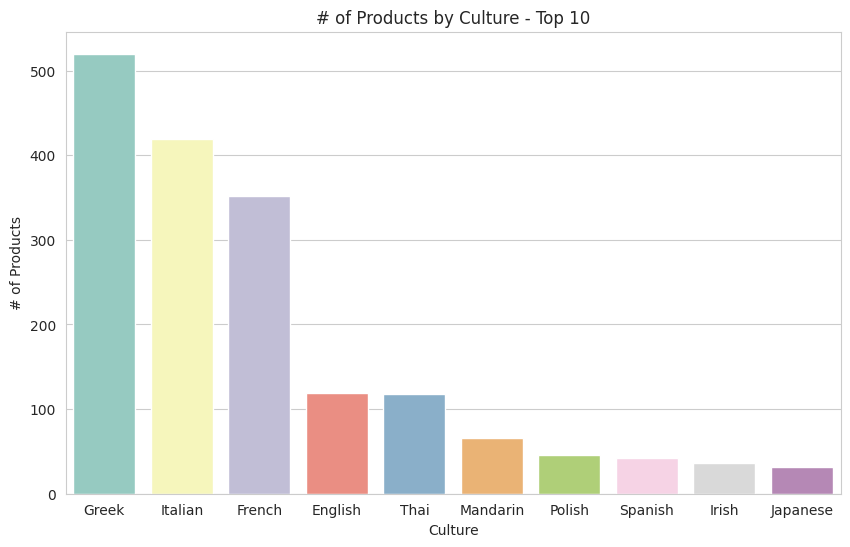

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="culture", y="freq", data=culture_products_freq.head(10), palette="Set3")
plt.title("# of Products by Culture - Top 10")
plt.xlabel("Culture")
plt.ylabel("# of Products")
plt.show()

In [9]:
depart_cult_agg = culture_products_dep.groupby(['department', 'culture']).agg({'product_id': 'count'}).reset_index()
culture_keep = culture_products_dep['culture'].value_counts().head(15).index.to_list()
depart_cult_agg = depart_cult_agg[depart_cult_agg['culture'].isin(culture_keep)].reset_index(drop=True)
depart_cult_agg.columns = ['department', 'culture', 'frequency']
depart_cult_agg.head()

,department,culture,frequency
0,alcohol,French,1
1,alcohol,German,3
2,alcohol,Icelandic,2
3,alcohol,Irish,9
4,alcohol,Italian,1


In [22]:
temp2 = pd.DataFrame()
depart_cult_agg_top5 = pd.DataFrame(columns=['department', 'culture', 'num_of_Products'])

for i in culture_products_freq.iloc[0:5, 0]:
    temp2 = depart_cult_agg.loc[depart_cult_agg['culture'] == i, :]
    temp2 = temp2.sort_values(by='frequency', ascending=False).iloc[0:5, :]
    temp2 = temp2[['department', 'culture', 'frequency']]
    temp2.columns = ['department', 'culture', 'num_of_Products']
    depart_cult_agg_top5 = pd.concat([depart_cult_agg_top5, temp2])

depart_cult_agg_top5.reset_index(drop=True, inplace=True)
display(depart_cult_agg_top5)

,department,culture,num_of_Products
0,dairy eggs,Greek,358
1,pantry,Greek,50
2,missing,Greek,35
3,frozen,Greek,21
4,deli,Greek,15
5,pantry,Italian,99
6,dry goods pasta,Italian,61
7,frozen,Italian,56
8,canned goods,Italian,45
9,meat seafood,Italian,34


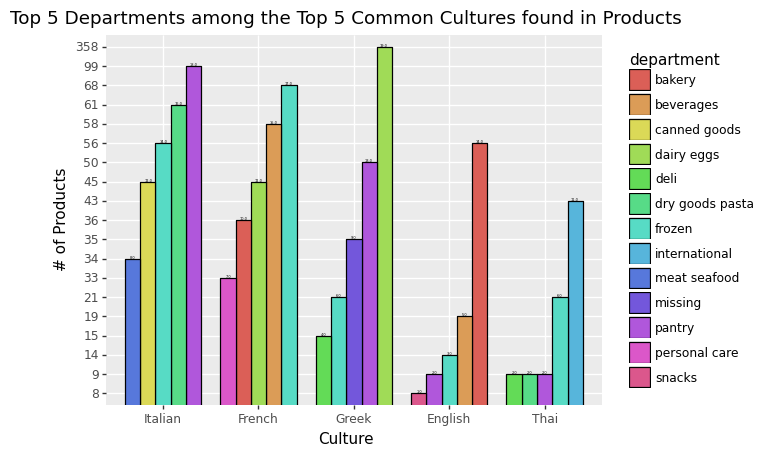

<ggplot: (8727476739961)>

In [24]:
(ggplot(depart_cult_agg_top5,
        aes(x='reorder(culture, -num_of_Products)', y='num_of_Products', fill='department')) +
 geom_bar(stat='identity', position=position_dodge(), color='black', width=.8) +
 stat_summary(aes(label='..y..'), geom='text', va='bottom', size=2.5, position=position_dodge(.789)) +
 labs(title='Top 5 Departments among the Top 5 Common Cultures found in Products', x='Culture', y='# of Products') +
 theme(plot_title=element_text(hjust=0.5)))

In [28]:
order_train_new = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(pro_train, pro, on='product_id'),
            culture_products_dep.drop('department', axis=1), on='product_id'
        ),
        dep, on='department_id'
    ),
    ord, on='order_id'
)
order_train_new['culture_flag'] = order_train_new['culture'].apply(lambda x: "Other Product" if pd.isna(x) else "Culture Product")

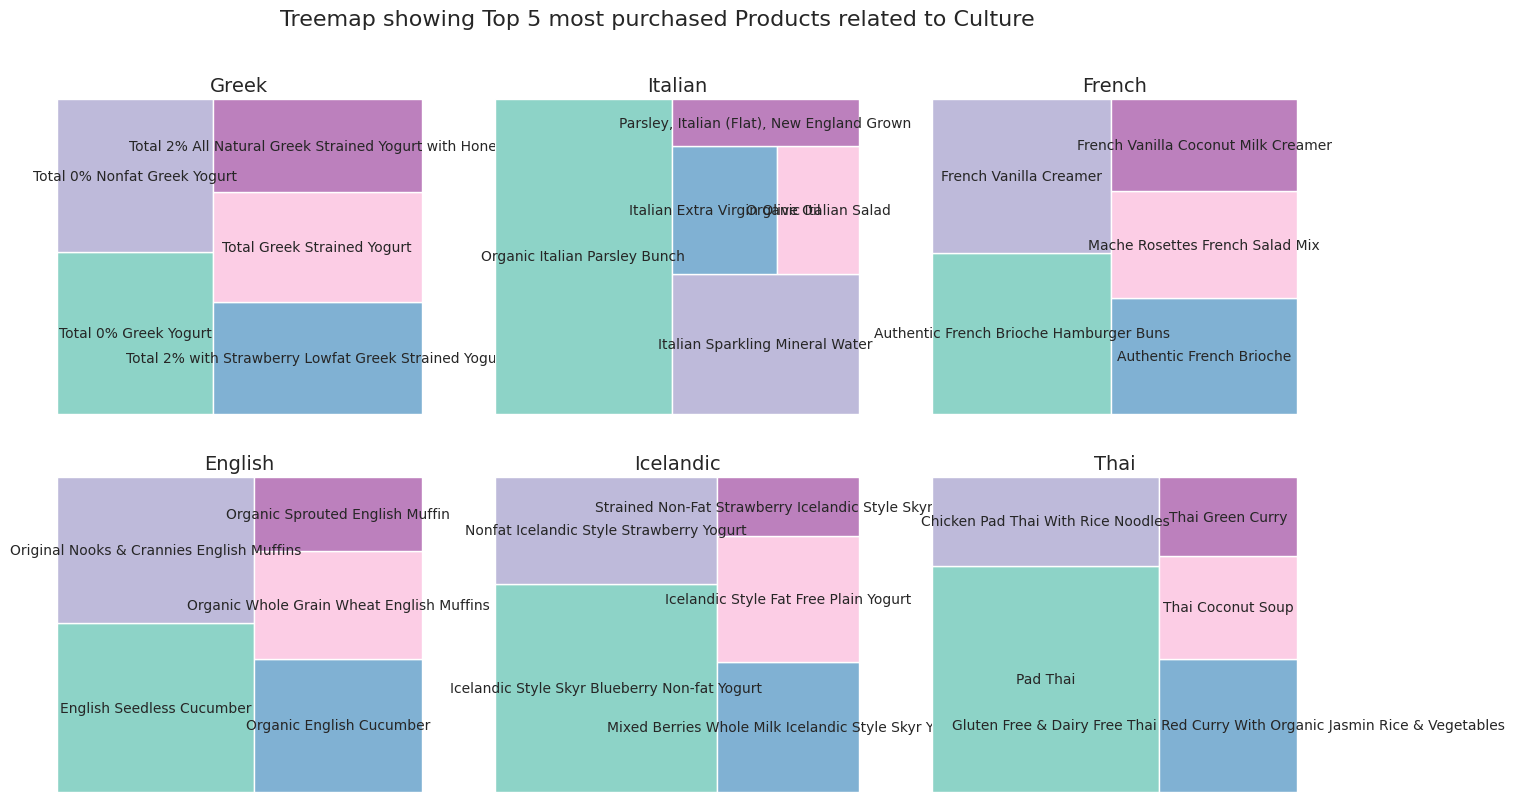

In [29]:
import squarify

# Creating dataset for all cultures, culture products, and the frequency of each product purchased
prod_freq_by_culture = order_train_new[order_train_new['culture_flag'] == "Culture Product"].groupby(['culture', 'product_name']).size().reset_index(name='purchase_frequency')

culture_list = ["Greek", "Italian", "French", "English", "Icelandic", "Thai"]

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
for ax, culture in zip(axes.flatten(), culture_list):
    data = prod_freq_by_culture[prod_freq_by_culture['culture'] == culture].sort_values(by='purchase_frequency', ascending=False)[:5]
    labels = data['product_name'].tolist()
    sizes = data['purchase_frequency'].tolist()
    colors = [plt.cm.Set3(i/float(len(labels))) for i in range(len(labels))]
    squarify.plot(sizes=sizes, label=labels, color=colors, ax=ax)
    ax.set_title(culture, fontsize=14)
    ax.axis('off')
fig.suptitle('Treemap showing Top 5 most purchased Products related to Culture', fontsize=16)
plt.show()

In [30]:
# Creating dataset for all cultures, culture products, and the frequency of each product purchased
prod_freq_by_culture = order_train_new[order_train_new['culture_flag'] == "Culture Product"].groupby(['culture', 'product_name']).size().reset_index(name='purchase_frequency')

# Save the dataset as a CSV file
prod_freq_by_culture.to_csv('prod_freq_by_culture.csv', index=False)

In [32]:

# read CSV file into a pandas DataFrame
df = pd.read_csv('prod_freq_by_culture.csv')

# convert DataFrame to JSON format and save to file
df.to_json('prod_freq_by_culture.json', orient='records')